In [163]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.stats import norm
import math 
import qutip as qt
from scipy.optimize import curve_fit

from scipy.stats import norm

import scipy.integrate as integrate

from scipy.signal import argrelextrema #Til opgave 2a
import seaborn

# local imports
from simulate_von_neumann import *

# set theme
seaborn.set_style('ticks')


seaborn.set(font_scale=1.25)

%reload_ext autoreload 
%autoreload 2

**To do:** 
- Detection error and measurement error are fractions and needs to sum to one or less right now!!! Perhaps we need to change it. Seems like it is not working proberly right now! 
- Decide finally on a measurement and error rate(!)

In [164]:
#Constant for all simulations in this experiment
#Simulation parameters
N_sim = 1000
N = 100
delta_t = 1

#System / meter parameters:
a0 = 1/(np.sqrt(2))+0j
b0 = np.sqrt(1-abs(a0)**2)
sigma = 1
g = sigma/4
epsilon = [0,(2*np.pi*g)/(sigma*N*40)]

rtot = 0.95 #total sucess rate
#detector and measurement success rates. 
rm = [0,1 - rtot ,(1-rtot)*0.5] #without measurement noise, with measurement noise
rd = [0, 0,(1-rtot)*0.5] 
t_span = np.linspace(0,N*delta_t-1,N)

seed = 43

In [165]:
# Simulation 1: Weak measurement
print(f'Simulation 1: eps {epsilon[0]} rm {rm[0]} rd {rd[0]}')
x1,a1,b1= Xeuler_sim(N_sim,N,g, epsilon[0], a0,b0,rm[0],rd[0], seed=seed, verbose=False)

# Simulation 2: Weak measurement with slow rabi oscilation
print(f"\nSimulation 2: eps {epsilon[1]} rm {rm[0]} rd {rd[0]}")
x2,a2,b2= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[0],rd[0], seed=seed, verbose=False)

# Simulation 3: Weak measurement with slow rabi oscilation, measurement error
print(f"\nSimulation 3: eps {epsilon[1]} rm {rm[1]} rd {rd[0]}")
x3,a3,b3= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[1],rd[1], seed=seed, verbose=False)

# Simulation 4: Weak measurement with slow rabi oscilation, equal measurement and detection error
print(f"\nSimulation 4: eps {epsilon[1]} rm {rm[0]} rd {rd[1]}")
x4,a4,b4= Xeuler_sim(N_sim,N,g, epsilon[1], a0,b0,rm[2],rd[2], seed=seed, verbose=False)


Simulation 1: eps 0 rm 0 rd 0

Simulation 2: eps 0.00039269908169872416 rm 0 rd 0

Simulation 3: eps 0.00039269908169872416 rm 0.050000000000000044 rd 0

Simulation 4: eps 0.00039269908169872416 rm 0 rd 0


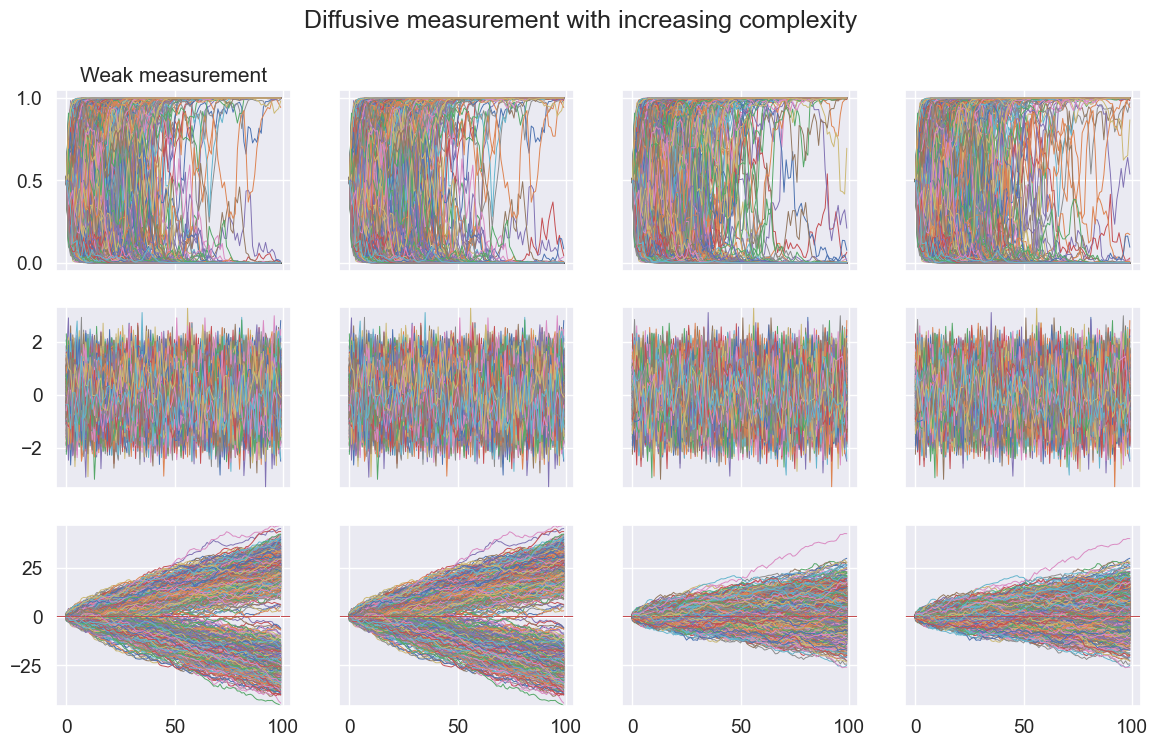

In [166]:
fig, ax = plt.subplots(3,4,figsize=(14,8),sharex='col', sharey='row')

# min max X for all simulations
min_X = min([min([min(x1[i]['X']), min(x2[i]['X']), min(x3[i]['X']), min(x4[i]['X'])]) for i in range(N_sim)])
max_X = max([max([max(x1[i]['X']), max(x2[i]['X']), max(x3[i]['X']), max(x4[i]['X'])]) for i in range(N_sim)])  

# cumulative sum min max for all simulations
min_X_cumsum = min([min([min(np.cumsum(x1[i]['X'])), min(np.cumsum(x2[i]['X'])), min(np.cumsum(x3[i]['X'])), min(np.cumsum(x4[i]['X']))]) for i in range(N_sim)])
max_X_cumsum = max([max([max(np.cumsum(x1[i]['X'])), max(np.cumsum(x2[i]['X'])), max(np.cumsum(x3[i]['X'])), max(np.cumsum(x4[i]['X']))]) for i in range(N_sim)])


fig.suptitle('Diffusive measurement with increasing complexity')

for i in range(N_sim):
    #Simulation 1
    ax[0,0].set_title('Weak measurement')
    ax[0,0].plot(t_span,abs(a1[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,0].plot(x1[i]['t'],x1[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,0].set_ylim(min_X, max_X)
    ax[2,0].plot(x1[i]['t'],np.cumsum(x1[i]['X']),linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[2,0].set_ylim(min_X_cumsum, max_X_cumsum)
    ax[2,0].axhline(y=0.5, color='r', linestyle='--',linewidth=0.5, alpha = 0.5)
    #Simulation 2
    ax[0,1].plot(t_span,abs(a2[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,1].plot(x2[i]['t'],x2[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,1].set_ylim(min_X, max_X)
    ax[2,1].plot(x2[i]['t'],np.cumsum(x2[i]['X']),linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[2,1].set_ylim(min_X_cumsum, max_X_cumsum)
    ax[2,1].axhline(y=0.5, color='r', linestyle='--',linewidth=0.5, alpha = 0.5)
    #Simulation 3
    ax[0,2].plot(t_span,abs(a3[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,2].plot(x3[i]['t'],x3[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[2,2].plot(x3[i]['t'],np.cumsum(x3[i]['X']),linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[2,2].set_ylim(min_X_cumsum, max_X_cumsum)
    ax[2,2].axhline(y=0.5, color='r', linestyle='--',linewidth=0.5, alpha = 0.5)
    #Simulation 4
    ax[0,3].plot(t_span,abs(a4[i][:-1])**2,linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,3].plot(x4[i]['t'],x4[i]['X'],linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1,3].set_ylim(min_X, max_X)
    ax[2,3].plot(x4[i]['t'],np.cumsum(x4[i]['X']),linewidth=0.7,label = fr'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[2,3].set_ylim(min_X_cumsum, max_X_cumsum)
    ax[2,3].axhline(y=0.5, color='r', linestyle='--',linewidth=0.5, alpha = 0.5)

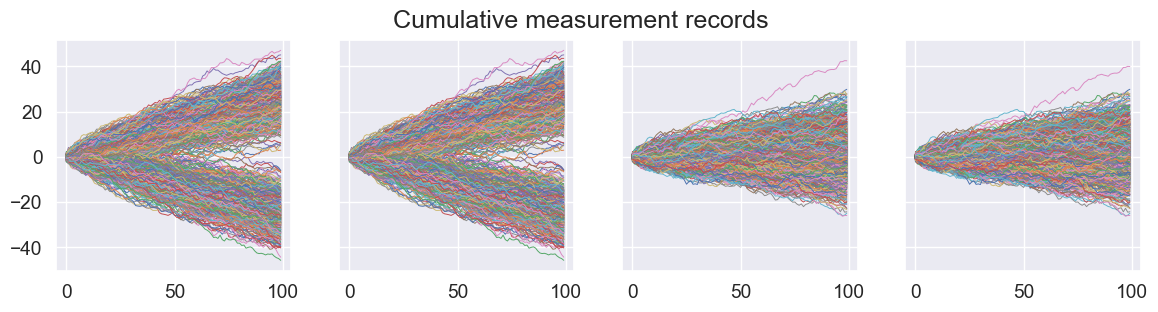

In [178]:
fig, ax = plt.subplots(1,4,figsize=(14,3),sharex='col', sharey='row')


fig.suptitle('Cumulative measurement records')
for i in range(N_sim):
    ax[0].plot(x1[i]['t'],np.cumsum(x1[i]['X']),linewidth=0.7,label = r'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[1].plot(x2[i]['t'],np.cumsum(x2[i]['X']),linewidth=0.7,label = r'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[2].plot(x3[i]['t'],np.cumsum(x3[i]['X']),linewidth=0.7,label = r'$P_+(t)=\mid c_+(t)\mid^2$')
    ax[3].plot(x4[i]['t'],np.cumsum(x4[i]['X']),linewidth=0.7,label = r'$P_+(t)=\mid c_+(t)\mid^2$')
    
plt.show()

Average number of errors

In [167]:
error3 = 0
error4 = 0 
for i in range(N_sim):
    error3 += N - len(x3[i]['X'])
    error4 += N - len(x4[i]['X'])

print(f"Error rate for simulation 1: {error3/N_sim}")
print(f"Error rate for simulation 2: {error4/N_sim}")

Error rate for simulation 1: 5.096
Error rate for simulation 2: 5.096


In [168]:
abs(a1[:,:-1])**2

array([[5.00000000e-01, 5.09998667e-01, 8.82881009e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 2.89050497e-01, 3.23004144e-01, ...,
        9.99999998e-01, 9.99999998e-01, 9.99999999e-01],
       [5.00000000e-01, 6.85680114e-01, 8.29204518e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       ...,
       [5.00000000e-01, 2.20973892e-01, 1.07168070e-01, ...,
        1.18651580e-12, 4.82401326e-13, 2.54366565e-13],
       [5.00000000e-01, 8.26353353e-01, 9.29563269e-01, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [5.00000000e-01, 4.10959566e-01, 3.23004144e-01, ...,
        4.59905538e-10, 4.78674639e-10, 1.18039713e-10]],
      shape=(1000, 100))

max density value in last time step: 0.8031833116501653
max density value in last time step: 0.8035947061978058
max density value in last time step: 0.7176162152851813
max density value in last time step: 0.7786123074305817


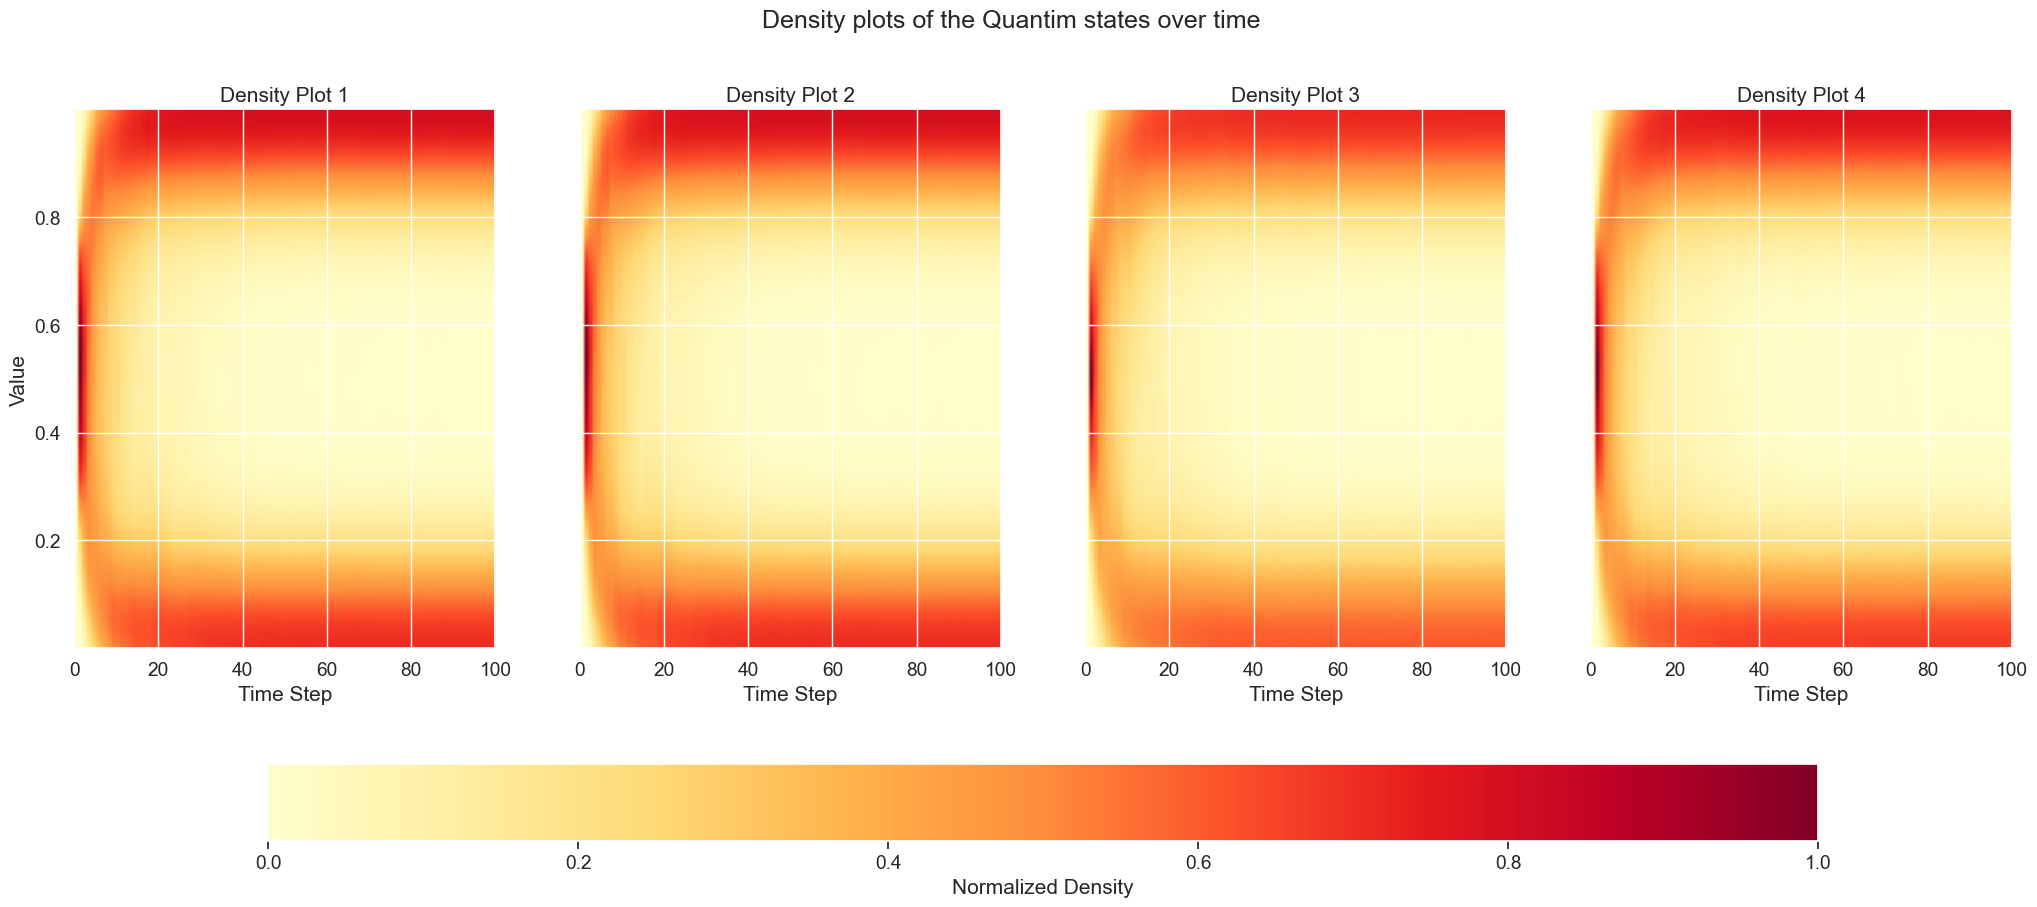

In [180]:
from scipy.stats import gaussian_kde

fig, axes = plt.subplots(1, 4, figsize=(25, 10), sharex=True, sharey=True)
fig.suptitle('Density plots of the Quantim states over time')
all_a = [a1, a2, a3, a4]

for idx, (a, ax) in enumerate(zip(all_a, axes)):
    a_prob = abs(a[:, :-1])**2

    # Create a density matrix
    x_vals = np.linspace(np.min(a_prob), np.max(a_prob), 500)  # Values over which to evaluate density
    density_matrix = np.zeros((len(x_vals), N))

    for t in range(N):
        kde = gaussian_kde(a_prob[:, t])  # KDE for column t
        density_matrix[:, t] = kde(x_vals)

    # Normalize the density matrix
    density_matrix /= density_matrix.max()

    print(f"max density value in last time step: {density_matrix[:,-1].max()}")
    # Plotting the density as a heatmap
    im = ax.imshow(
        density_matrix, 
        aspect='auto', 
        extent=[0, N, x_vals[0], x_vals[-1]], 
        origin='lower', 
        cmap = 'YlOrRd'
    )
    ax.set_title(f'Density Plot {idx + 1}')
    ax.set_xlabel('Time Step')
    if idx == 0:
        ax.set_ylabel('Value')

#fig.colorbar(im, ax=axes, location='right', shrink=0.8, label='Normalized Density')
fig.colorbar(im, ax=axes, location='bottom', shrink=0.8, label='Normalized Density', orientation='horizontal')
#plt.tight_layout()
plt.show()

In [170]:
# Create a density matrix
x_vals = np.linspace(np.min(a), np.max(a), 500)  # Values over which to evaluate density
density_matrix = np.zeros((len(x_vals), N))

for t in range(N):
    kde = gaussian_kde(a[:, t])  # KDE for column t
    density_matrix[:, t] = kde(x_vals)

# Plotting the density as a heatmap
plt.figure(figsize=(10, 6))
plt.imshow(
    density_matrix, 
    aspect='auto', 
    extent=[0, N, x_vals[0], x_vals[-1]], 
    origin='lower', 
    cmap='viridis'
)
plt.colorbar(label='Density')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title('Density of Samples at Each Time Step')
plt.show()

ValueError: Buffer dtype mismatch, expected 'long double' but got 'complex double'